In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("All libraries imported successfully!")


All libraries imported successfully!


In [2]:
df = pd.read_csv('/content/FarmFlow_Data.csv', dtype={'grade': str})

In [3]:
df.head()

,id,state_id,state_name,district_id,district_name,market_id,market_name,census_state_id,census_state_name,census_district_id,census_district_name,commodity_id,commodity_name,variety,grade,min_price,max_price,modal_price,date
0,44111143,AP,Andhra Pradesh,17,Kurnool,387,Allagadda,28,ANDHRA PRADESH,552,Kurnool,3,Rice,Sona,NaN,3100.0,3300.0,3150.0,2019-01-01
1,44111144,AP,Andhra Pradesh,23,West Godavari,1018,Palakole,28,ANDHRA PRADESH,546,West Godavari,3,Rice,Sona Mansoori Non Basmati,NaN,4200.0,4250.0,4200.0,2019-01-01
2,44119078,AP,Andhra Pradesh,13,Chittor,382,Palamaner,28,ANDHRA PRADESH,554,Chittoor,87,Green Chilli,Green Chilly,NaN,1500.0,2500.0,2000.0,2019-01-01
3,44119336,TL,Telangana,2,Hyderabad,1119,Gudimalkapur,28,ANDHRA PRADESH,536,Hyderabad,87,Green Chilli,Green Chilly,NaN,1200.0,2500.0,1800.0,2019-01-01
4,44119337,TL,Telangana,2,Hyderabad,2046,Bowenpally,28,ANDHRA PRADESH,536,Hyderabad,87,Green Chilli,Green Chilly,NaN,500.0,2500.0,2000.0,2019-01-01


In [4]:
df.tail()

,id,state_id,state_name,district_id,district_name,market_id,market_name,census_state_id,census_state_name,census_district_id,census_district_name,commodity_id,commodity_name,variety,grade,min_price,max_price,modal_price,date
694603,64459506,MH,Maharashtra,1,Ahmednagar,2475,Rahuri(Vambori),27,MAHARASHTRA,522,Ahmadnagar,23,Onion,Other,NaN,300.0,3600.0,2700.0,2023-11-23
694604,64459507,MH,Maharashtra,2,Akola,154,Akola,27,MAHARASHTRA,501,Akola,23,Onion,Other,NaN,3000.0,4000.0,3500.0,2023-11-23
694605,64459508,MH,Maharashtra,4,Buldhana,599,Malkapur,27,MAHARASHTRA,500,Buldana,23,Onion,Local,NaN,2405.0,3500.0,3111.0,2023-11-23
694606,64459509,MH,Maharashtra,5,Dhule,157,Dhule,27,MAHARASHTRA,498,Dhule,23,Onion,Red,NaN,400.0,3500.0,2500.0,2023-11-23
694607,64459510,MH,Maharashtra,5,Dhule,1436,Sakri,27,MAHARASHTRA,498,Dhule,23,Onion,Red,NaN,1550.0,3.0,NaN,NaN


In [5]:
df.shape

(694608, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694608 entries, 0 to 694607
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    694608 non-null  int64  
 1   state_id              694608 non-null  object 
 2   state_name            694608 non-null  object 
 3   district_id           694608 non-null  int64  
 4   district_name         694608 non-null  object 
 5   market_id             694608 non-null  int64  
 6   market_name           694608 non-null  object 
 7   census_state_id       694608 non-null  int64  
 8   census_state_name     694608 non-null  object 
 9   census_district_id    694608 non-null  int64  
 10  census_district_name  694608 non-null  object 
 11  commodity_id          694608 non-null  int64  
 12  commodity_name        694608 non-null  object 
 13  variety               694608 non-null  object 
 14  grade                 7144 non-null    object 
 15  

In [7]:
df.describe()

,id,district_id,market_id,census_state_id,census_district_id,commodity_id,min_price,max_price,modal_price
count,6.946080e+05,694608.000000,694608.000000,694608.000000,694608.000000,694608.000000,694257.000000,694595.000000,694607.000000
mean,5.691393e+07,12.981225,1305.204923,26.194731,512.490429,39.306335,6166.448650,7803.964786,7213.163264
std,7.775414e+06,7.498571,1149.494307,2.122319,38.243408,42.522066,9325.178937,11336.967823,10654.976680
min,4.411019e+07,1.000000,1.000000,24.000000,468.000000,1.000000,0.000000,0.000000,1.000000
25%,5.016424e+07,7.000000,465.000000,24.000000,476.000000,10.000000,1500.000000,2000.000000,1815.000000
50%,5.652132e+07,12.000000,863.000000,27.000000,505.000000,23.000000,2375.000000,3000.000000,2700.000000
75%,6.315707e+07,18.000000,1788.000000,28.000000,541.000000,78.000000,6000.000000,7175.000000,6730.000000
max,7.251615e+07,36.000000,10121.000000,29.000000,583.000000,150.000000,80000.000000,105000.000000,85500.000000


In [8]:
df.size

13197552

In [9]:
print("Missing Values Count:\n", df.isnull().sum())
print("\nMissing Values Percentage:\n", (df.isnull().sum() / len(df)) * 100)


Missing Values Count:
 id                           0
state_id                     0
state_name                   0
district_id                  0
district_name                0
market_id                    0
market_name                  0
census_state_id              0
census_state_name            0
census_district_id           0
census_district_name         0
commodity_id                 0
commodity_name               0
variety                      0
grade                   687464
min_price                  351
max_price                   13
modal_price                  1
date                         1
dtype: int64

Missing Values Percentage:
 id                       0.000000
state_id                 0.000000
state_name               0.000000
district_id              0.000000
district_name            0.000000
market_id                0.000000
market_name              0.000000
census_state_id          0.000000
census_state_name        0.000000
census_district_id       0.000000
census

In [10]:
print(df.columns)


Index(['id', 'state_id', 'state_name', 'district_id', 'district_name',
       'market_id', 'market_name', 'census_state_id', 'census_state_name',
       'census_district_id', 'census_district_name', 'commodity_id',
       'commodity_name', 'variety', 'grade', 'min_price', 'max_price',
       'modal_price', 'date'],
      dtype='object')


In [11]:
if 'grade' in df.columns:
  df.drop(columns=['grade'],inplace=True)
  print("Grade column dropped successfully.")
else:
  print("Grade column not found in the DataFrame.")

df['min_price'].fillna(df['min_price'].median())
df['max_price'].fillna(df['max_price'].median())

print("Missing values handled successfully!")

Grade column dropped successfully.
Missing values handled successfully!


In [12]:
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows: {duplicate_count}")

Total Duplicate Rows: 0


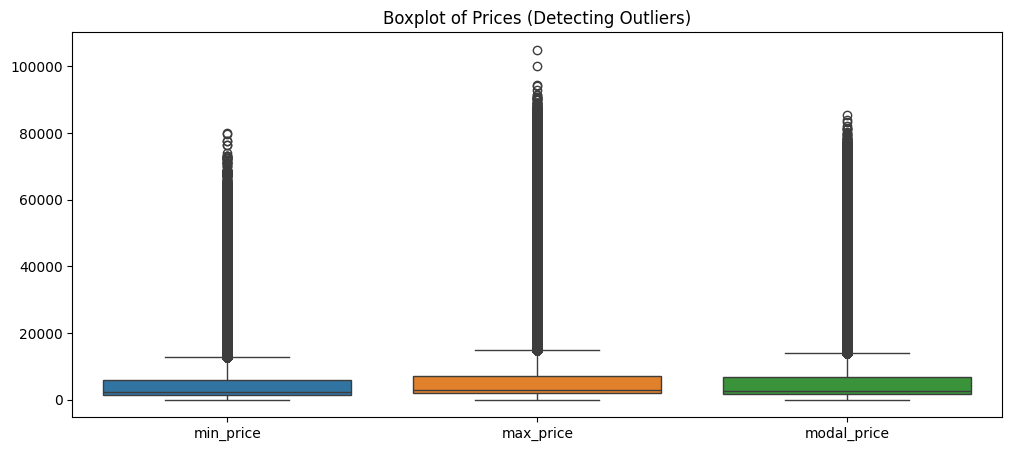

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['min_price', 'max_price', 'modal_price']])
plt.title('Boxplot of Prices (Detecting Outliers)')
plt.show()

In [14]:
def remove_outliers_iqr(df, column, threshold=1.2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Apply stricter filtering
df = remove_outliers_iqr(df, 'min_price')
df = remove_outliers_iqr(df, 'max_price')
df = remove_outliers_iqr(df, 'modal_price')

print("✅ Stricter Outliers Removed Successfully!")



✅ Stricter Outliers Removed Successfully!


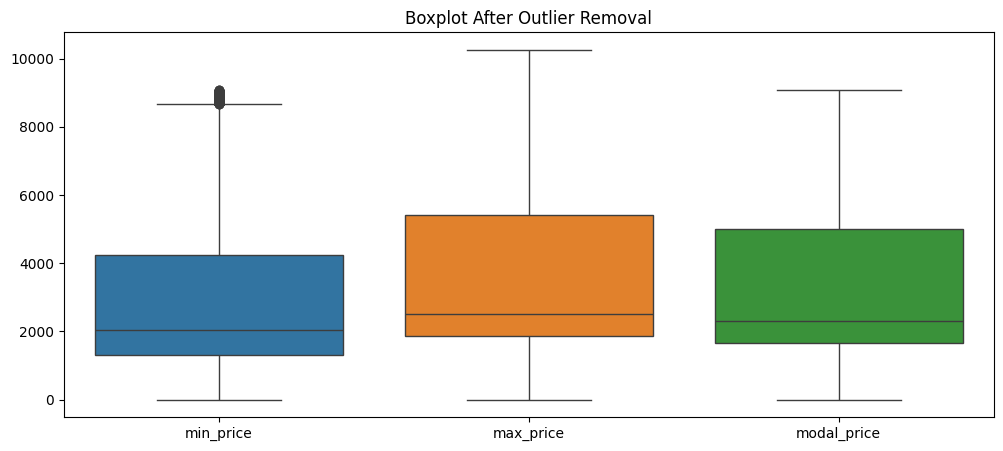

In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['min_price', 'max_price', 'modal_price']])
plt.title('Boxplot After Outlier Removal')
plt.show()


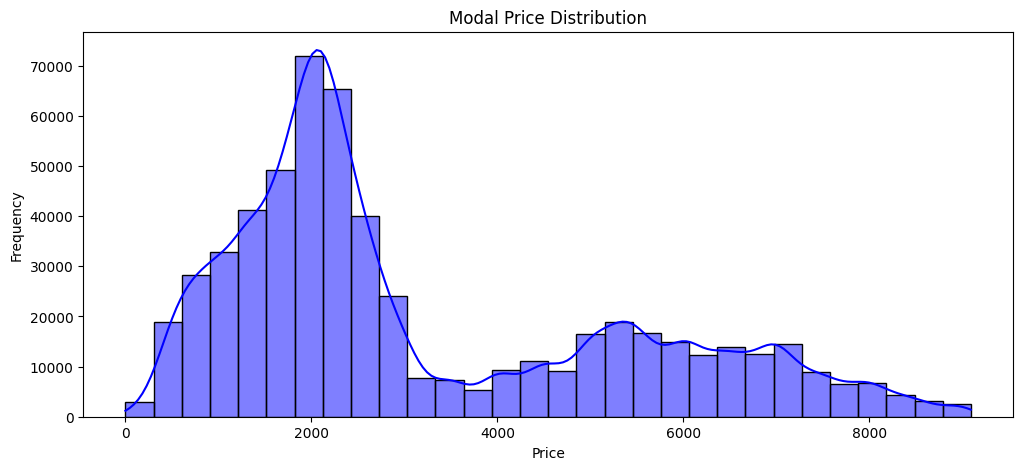

In [16]:

plt.figure(figsize=(12, 5))
sns.histplot(df['modal_price'], kde=True, bins=30, color="blue")
plt.title("Modal Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [17]:
print(df.columns)

Index(['id', 'state_id', 'state_name', 'district_id', 'district_name',
       'market_id', 'market_name', 'census_state_id', 'census_state_name',
       'census_district_id', 'census_district_name', 'commodity_id',
       'commodity_name', 'variety', 'min_price', 'max_price', 'modal_price',
       'date'],
      dtype='object')


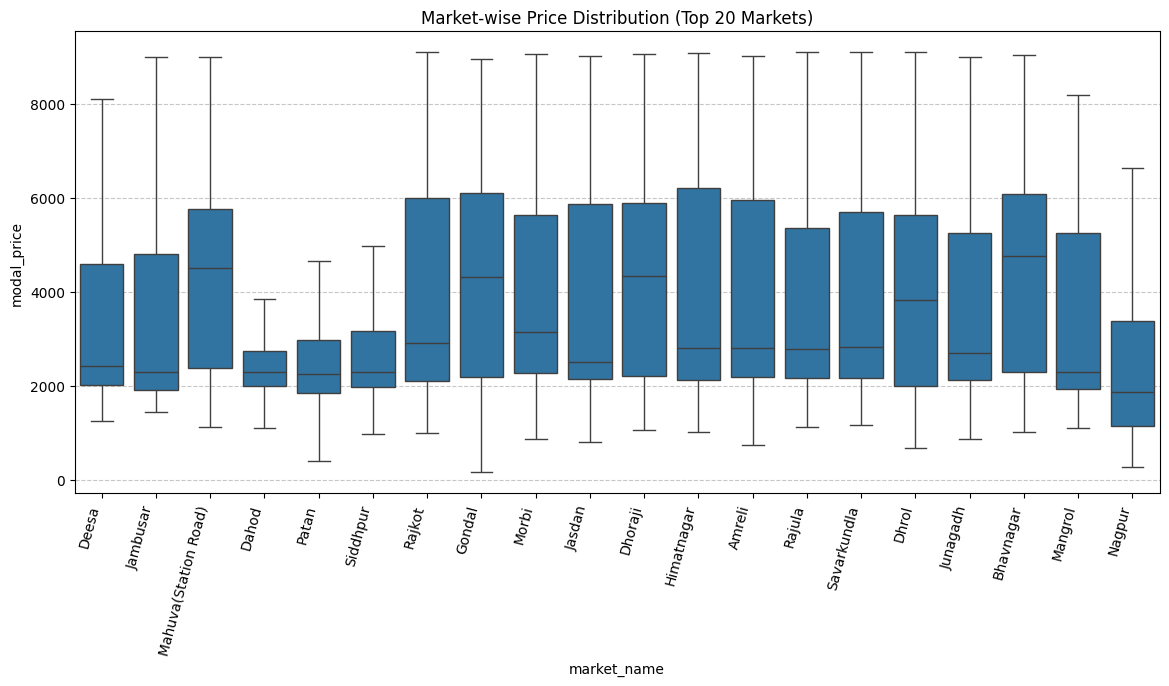

In [18]:
# 🔹 Market-wise Price Trends (Top 20 Markets)
plt.figure(figsize=(14, 6))
top_markets = df['market_name'].value_counts().index[:20]
df_filtered = df[df['market_name'].isin(top_markets)]
sns.boxplot(x="market_name", y="modal_price", data=df_filtered, showfliers=False)
plt.xticks(rotation=75, ha='right',fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Market-wise Price Distribution (Top 20 Markets)")
plt.show()


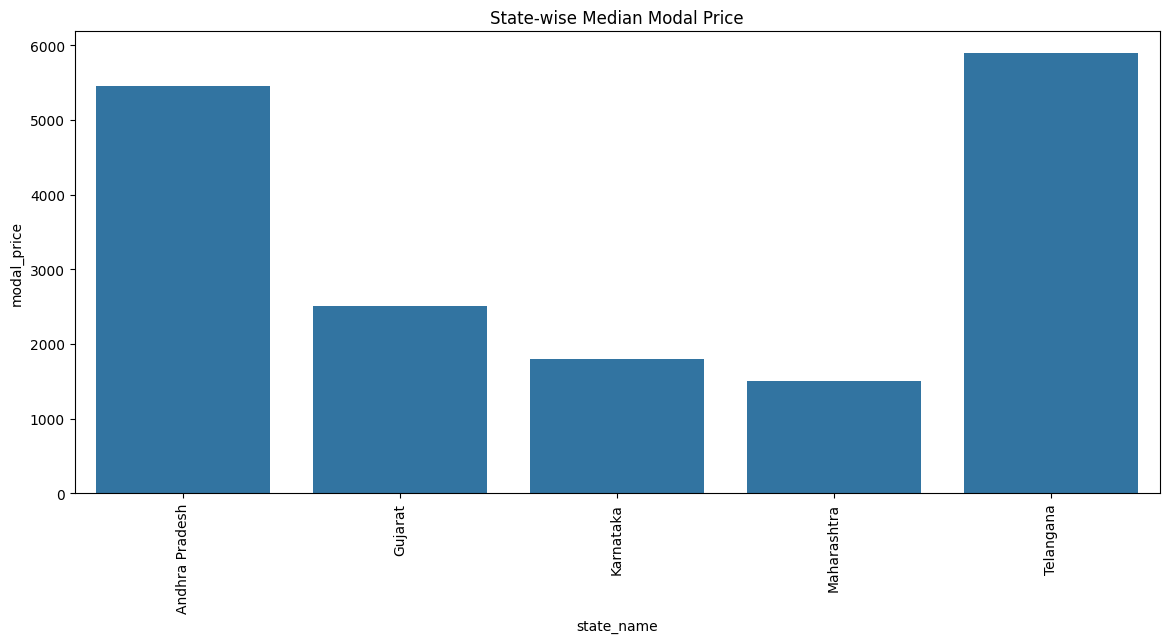

In [19]:
# 🔹 State-wise Median Modal Price Visualization
plt.figure(figsize=(14, 6))
df_grouped = df.groupby("state_name")["modal_price"].median().reset_index()
sns.barplot(x="state_name", y="modal_price", data=df_grouped)
plt.xticks(rotation=90)
plt.title("State-wise Median Modal Price")
plt.show()


In [20]:
df['date'] = pd.to_datetime(df['date'])  # Date ko datetime format me convert karna
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

print(df[['date', 'year', 'month', 'day']].head())  # Check karo output sahi aa raha hai ya nahi


        date  year  month  day
0 2019-01-01  2019      1    1
1 2019-01-01  2019      1    1
2 2019-01-01  2019      1    1
3 2019-01-01  2019      1    1
4 2019-01-01  2019      1    1


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['commodity_encoded'] = le.fit_transform(df['commodity_name'])
print(df[['commodity_name', 'commodity_encoded']].head(10))

  commodity_name  commodity_encoded
0           Rice                 11
1           Rice                 11
2   Green Chilli                  6
3   Green Chilli                  6
4   Green Chilli                  6
5   Green Chilli                  6
6   Green Chilli                  6
7           Rice                 11
8           Rice                 11
9      Groundnut                  7


In [22]:
#features
features = ['year','month','day','commodity_encoded']
target = ['modal_price']


In [23]:
# Model ke liye relevant columns choose karna
final_df = df[['year', 'month', 'day', 'commodity_name', 'min_price', 'max_price', 'modal_price']]

print(final_df.head())


   year  month  day commodity_name  min_price  max_price  modal_price
0  2019      1    1           Rice     3100.0     3300.0       3150.0
1  2019      1    1           Rice     4200.0     4250.0       4200.0
2  2019      1    1   Green Chilli     1500.0     2500.0       2000.0
3  2019      1    1   Green Chilli     1200.0     2500.0       1800.0
4  2019      1    1   Green Chilli      500.0     2500.0       2000.0


In [24]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
df['commodity_encoded'] = le.fit_transform(df['commodity_name'])

# Encode hone ke baad check karein
print(df[['commodity_name', 'commodity_encoded']].head())


  commodity_name  commodity_encoded
0           Rice                 11
1           Rice                 11
2   Green Chilli                  6
3   Green Chilli                  6
4   Green Chilli                  6


In [25]:
final_df = df[['year', 'month', 'day', 'commodity_encoded', 'min_price', 'max_price', 'modal_price']]
print(final_df.head())

   year  month  day  commodity_encoded  min_price  max_price  modal_price
0  2019      1    1                 11     3100.0     3300.0       3150.0
1  2019      1    1                 11     4200.0     4250.0       4200.0
2  2019      1    1                  6     1500.0     2500.0       2000.0
3  2019      1    1                  6     1200.0     2500.0       1800.0
4  2019      1    1                  6      500.0     2500.0       2000.0


In [38]:
X = final_df.drop(columns=['modal_price'])  # Input Features
y = final_df['modal_price']

In [49]:
# 5 Lakh Rows ka Random Sample
df_sample = df.sample(500000, random_state=42)

df_sample.reset_index(drop=True, inplace=True)


print("Sampled Dataset Shape:", df_sample.shape)

# 🔹 Sample Data Preview
df_sample.head()


Sampled Dataset Shape: (500000, 22)


,id,state_id,state_name,district_id,district_name,market_id,market_name,census_state_id,census_state_name,census_district_id,...,commodity_name,variety,min_price,max_price,modal_price,date,year,month,day,commodity_encoded
0,55116094,GJ,Gujarat,3,Banaskanth,1143,Palanpur,24,GUJARAT,469,...,Groundnut,Groundnut seed,5000.0,6840.0,5920.0,2021-10-21,2021,10,21,7
1,61961439,GJ,Gujarat,15,Amreli,1793,Savarkundla,24,GUJARAT,480,...,Bajra(Pearl Millet/Cumbu),Deshi,2250.0,2640.0,2445.0,2023-05-01,2023,5,1,1
2,46085708,MH,Maharashtra,19,Aurangabad,581,Aurangabad,27,MAHARASHTRA,515,...,Onion,Other,400.0,1450.0,925.0,2019-06-08,2019,6,8,9
3,60130216,AP,Andhra Pradesh,17,Kurnool,863,Adoni,28,ANDHRA PRADESH,552,...,Groundnut,Balli/Habbu,4291.0,7843.0,5499.0,2022-12-05,2022,12,5,7
4,58790144,MH,Maharashtra,11,Nagpur,2117,Ramtek,27,MAHARASHTRA,505,...,Onion,Other,2000.0,2400.0,2200.0,2022-08-14,2022,8,14,9


In [50]:
final_df = df_sample[['year', 'month', 'day', 'commodity_encoded', 'min_price', 'max_price', 'modal_price']]

# ✅ Check Final Data
print(final_df.head())
print("Final Dataset Shape:", final_df.shape)


   year  month  day  commodity_encoded  min_price  max_price  modal_price
0  2021     10   21                  7     5000.0     6840.0       5920.0
1  2023      5    1                  1     2250.0     2640.0       2445.0
2  2019      6    8                  9      400.0     1450.0        925.0
3  2022     12    5                  7     4291.0     7843.0       5499.0
4  2022      8   14                  9     2000.0     2400.0       2200.0
Final Dataset Shape: (500000, 7)


In [51]:
X = df[["year", "month", "day", "commodity_encoded"]]
y = df["modal_price"]
print("Features & Target Selected!")
print(" X Shape:", X.shape)
print(" y Shape:", y.shape)

Features & Target Selected!
 X Shape: (577307, 4)
 y Shape: (577307,)


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Check Shapes
print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)

Training Data Shape: (461845, 4) (461845,)
Testing Data Shape: (115462, 4) (115462,)


In [53]:
model = RandomForestRegressor(n_estimators=100, random_state=42,n_jobs=-1)

print("Model Initialized Successfully!")

Model Initialized Successfully!


In [54]:
model.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


In [55]:
y_pred = model.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Square Root lo manually
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

MAE: 350.71262781043185
MSE: 352602.90414449805
RMSE: 593.8037589511354
R² Score: 0.9244490747707306


In [57]:
import joblib  #

#  Random Forest Regression Model Save
joblib.dump(model, "FarmFlow_Price_Model.pkl")

print("Random Forest Model Saved Successfully!")


Random Forest Model Saved Successfully!


In [58]:
#  Random Forest Model Load
loaded_model = joblib.load("FarmFlow_Price_Model.pkl")

print("Random Forest Model Loaded Successfully!")


Random Forest Model Loaded Successfully!


In [59]:
import pandas as pd
import joblib

In [63]:

from sklearn.preprocessing import LabelEncoder

# Assuming you used 'le' as the variable name earlier:
# Save the label encoder using 'le'
joblib.dump(le, "commodity_label_encoder.pkl")
print("✅ Commodity Label Encoder Saved!")

✅ Commodity Label Encoder Saved!


In [64]:
encoder = joblib.load("commodity_label_encoder.pkl")
print("✅ Commodity Label Encoder Loaded Successfully!")


✅ Commodity Label Encoder Loaded Successfully!


In [69]:
import pandas as pd

def predict_price(year, month, day, commodity_name):
    commodity_encoded = encoder.transform([commodity_name])[0]  # Encode commodity name

    # 🔹 Input Data ko DataFrame banao with same feature names
    input_data = pd.DataFrame([[year, month, day, commodity_encoded]],
                              columns=["year", "month", "day", "commodity_encoded"])

    predicted_price = model.predict(input_data)[0]  # Model se prediction lo

    # 🎯 Formatted Output
    output = f"""
    🔥 **Final Output:**
    📅 **Date:** {year}-{month:02d}-{day:02d}
    🌾 **Commodity:** {commodity_name}
    💰 **Predicted Price:** ₹{predicted_price:.2f}
    """
    return output

# 🏆 Test Prediction
print(predict_price(2025, 3, 15, "Rice"))




    🔥 **Final Output:**
    📅 **Date:** 2025-03-15
    🌾 **Commodity:** Rice
    💰 **Predicted Price:** ₹3519.11
    
